Multiple linear regression for prediction of power plunt electricity consumption

In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('PowerPlant.csv',sep=';',decimal=',')

In [23]:
for col in data.columns:
    print(data[col][0])
    pd.to_numeric(data[col],downcast='float')
    
x = data.drop(['PE'],axis=1).values
y = data['PE'].values
data.head()

8.34
40.77
1010.84
90.01
480.48


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [24]:
print(y)

[480.48 445.75 438.76 ... 465.96 450.93 451.67]


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [29]:
y_pred = model.predict(x_test)
print(y_pred)

[433.33259502 448.37969342 445.91247797 ... 444.05809103 459.34745691
 472.91532015]


In [30]:
model.predict([[23.68,51.3,1011.86,71.24]]) #y actual value =451.67

array([447.34319695])

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9289374661293962

Text(0.5, 1.0, 'Actual vs Predicted')

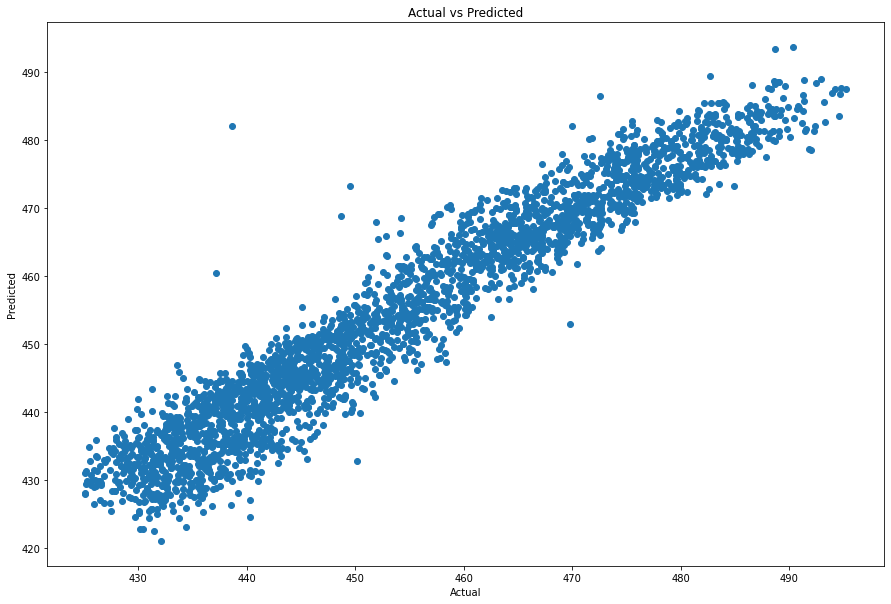

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [40]:
dF_pred = pd.DataFrame({'Actual value':y_test,'Predicted':y_pred,'Difference' : y_test - y_pred})
dF_pred[0:20]

,Actual value,Predicted,Difference
0,426.18,433.332595,-7.152595
1,451.10,448.379693,2.720307
2,442.87,445.912478,-3.042478
3,443.70,445.986055,-2.286055
4,460.59,462.822292,-2.232292
5,438.00,440.810771,-2.810771
6,484.31,482.716625,1.593375
7,464.18,462.222261,1.957739
8,452.53,451.261034,1.268966
9,445.54,445.431174,0.108826
